### C-0

In [1]:
from sklearn.model_selection import train_test_split

def pre_processing_for_No_INJ_I(x):
    if x == 0:
        return 0
    elif x < 5:
        return 1
    else:
        return 2

def pre_processing_for_veh_INVL(x):
    if x < 5:
        return x
    else:
        return 6    



### C-1

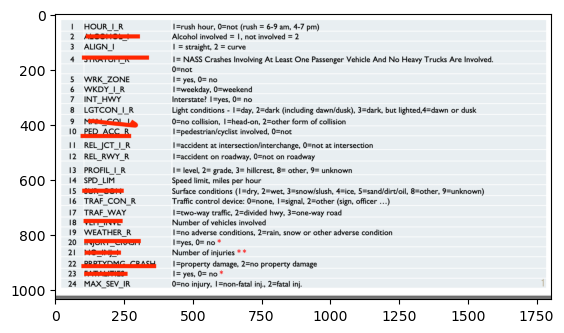

In [2]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('./vari.png'))

In [15]:
import pandas as pd
data = pd.read_csv('./accidentsFull.csv')
data["Injury"] = data["INJURY_CRASH"].apply(lambda x: 0 if x == 0 else 1)
pre_processed_data = data.copy()
pre_processed_data = pre_processed_data.drop(['ALCHL_I', 'STRATUM_R', 'MANCOL_I_R', 'PED_ACC_R', 'SUR_COND', 'VEH_INVL', 'INJURY_CRASH', 'NO_INJ_I', 'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'], axis=1)
#pre_processed_data["NO_INJ_I"] = data.copy()["NO_INJ_I"].apply(pre_processing_for_No_INJ_I)
#pre_processed_data["VEH_INVL"] = data.copy()["VEH_INVL"].apply(pre_processing_for_veh_INVL)
x = pre_processed_data.copy().drop(['Injury'], axis=1)
y = pre_processed_data.copy()['Injury']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=3)

### C-2

In [16]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score

clf_with_full_dataset = CategoricalNB(alpha=0, force_alpha=True).fit(x_train, y_train)
print(accuracy_score(y_train, clf_with_full_dataset.predict(x_train)))
confusion_matrix(y_train, clf_with_full_dataset.predict(x_train))

0.5332490418428227


/home/administrator/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:1504: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


array([[6652, 6081],
       [5732, 6844]])

### C-3

In [17]:
print(accuracy_score(y_test, clf_with_full_dataset.predict(x_test)))
print(clf_with_full_dataset.predict_proba(x_test)[:15])
print(clf_with_full_dataset.predict(x_test)[:15])
confusion_matrix(y_test, clf_with_full_dataset.predict(x_test))

0.5397653194263363
[[0.44299186 0.55700814]
 [0.47450027 0.52549973]
 [0.45380909 0.54619091]
 [0.38581902 0.61418098]
 [0.51311405 0.48688595]
 [0.6747063  0.3252937 ]
 [0.46994951 0.53005049]
 [0.48655575 0.51344425]
 [0.62015504 0.37984496]
 [0.61494572 0.38505428]
 [0.45383945 0.54616055]
 [0.41703704 0.58296296]
 [0.50946199 0.49053801]
 [0.40536307 0.59463693]
 [0.51105395 0.48894605]]
[1 1 1 1 0 0 1 1 0 0 1 1 0 1 0]


array([[4488, 3966],
       [3800, 4620]])

### C-4

In [18]:
pre_processed_data

,HOUR_I_R,ALIGN_I,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,RELJCT_I_R,REL_RWY_R,PROFIL_I_R,SPD_LIM,TRAF_CON_R,TRAF_WAY,WEATHER_R,Injury
0,0,2,0,1,0,3,1,0,1,40,0,3,1,1
1,1,1,0,1,1,3,1,1,1,70,0,3,2,0
2,1,1,0,1,0,3,1,1,1,35,1,2,2,0
3,1,1,0,0,0,3,1,1,1,35,1,2,1,0
4,1,1,0,1,0,3,0,1,1,25,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42178,0,1,1,1,0,1,0,0,0,45,2,1,1,0
42179,1,1,0,0,0,1,1,0,0,55,0,1,1,1
42180,0,2,0,1,0,1,0,0,0,55,0,1,1,0
42181,1,1,0,1,0,1,0,0,0,65,0,1,1,0


<Axes: >

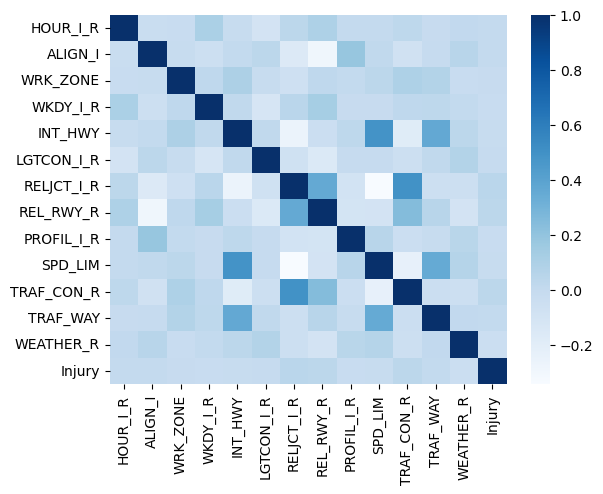

In [27]:
import seaborn as sns
sns.heatmap(pre_processed_data.corr(), annot=False, cmap='Blues')

In [34]:
import pandas as pd
data = pd.read_csv('./accidentsFull.csv')
data["Injury"] = data["INJURY_CRASH"].apply(lambda x: 0 if x == 0 else 1)
pre_processed_data = data.copy()
pre_processed_data = pre_processed_data.drop(['ALCHL_I', 'STRATUM_R', 'MANCOL_I_R', 'PED_ACC_R', 'SUR_COND', 'VEH_INVL', 'INJURY_CRASH', 'NO_INJ_I', 'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'], axis=1)
#pre_processed_data["NO_INJ_I"] = data.copy()["NO_INJ_I"].apply(pre_processing_for_No_INJ_I)
#pre_processed_data["VEH_INVL"] = data.copy()["VEH_INVL"].apply(pre_processing_for_veh_INVL)
x = pre_processed_data.copy().drop(['Injury'], axis=1)
y = pre_processed_data.copy()['Injury']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=3)

In [35]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score

clf_with_full_dataset = CategoricalNB(alpha=0, force_alpha=True).fit(x_train, y_train)
print(accuracy_score(y_train, clf_with_full_dataset.predict(x_train)))
confusion_matrix(y_train, clf_with_full_dataset.predict(x_train))
print(accuracy_score(y_test, clf_with_full_dataset.predict(x_test)))
print(clf_with_full_dataset.predict_proba(x_test)[:15])
print(clf_with_full_dataset.predict(x_test)[:15])
confusion_matrix(y_test, clf_with_full_dataset.predict(x_test))

0.5359753447390256


/home/administrator/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:1504: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


array([[6566, 6167],
       [5577, 6999]])

0.5389949034016831
[[0.45301553 0.54698447]
 [0.4846166  0.5153834 ]
 [0.46387369 0.53612631]
 [0.42608898 0.57391102]
 [0.49733957 0.50266043]
 [0.66070532 0.33929468]
 [0.48005745 0.51994255]
 [0.47080822 0.52919178]
 [0.60518008 0.39481992]
 [0.59989788 0.40010212]
 [0.43824701 0.56175299]
 [0.45813486 0.54186514]
 [0.49368594 0.50631406]
 [0.44619098 0.55380902]
 [0.49527838 0.50472162]]
[1 1 1 1 1 0 1 1 0 0 1 1 1 1 1]


array([[4410, 4044],
       [3735, 4685]])